In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [36]:
# 8.1 
# Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. 
# Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

display(diabetes.info())

mask = diabetes.duplicated()
diabetes_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')
diabetes_dedupped = diabetes.drop_duplicates()
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


None

Число найденных дубликатов: 10
Результирующее число записей: 768


In [37]:
# 8.2 
# Далее найдите все неинформативные признаки в данных и избавьтесь от них. 
# В качестве порога информативности возьмите 0.99: 
# удалите все признаки, для которых 99 % значений повторяются или 99 % записей уникальны. 

#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
diabetes_new = diabetes_dedupped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes_new.shape[1]}')


Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


In [38]:
# 8.3
# Попробуйте найти пропуски в данных с помощью метода isnull().
# Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. 
# Его вы можете взять из библиотеки numpy: np.nan.

#Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabetes_new[column] = diabetes_new[column].apply(lambda x: np.nan if x == 0 else x)

cols_null_percent = round(diabetes_new.isnull().mean() * 100, 2)
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Insulin          48.70
SkinThickness    29.56
BloodPressure     4.56
BMI               1.43
Glucose           0.65
dtype: float64

In [50]:
def nan_function(x):
    return np.nan if x == 0 else x
diabetes_new["Glucose"] = diabetes_new["Glucose"].apply(nan_function)
diabetes_new["BloodPressure"] = diabetes_new["BloodPressure"].apply(nan_function)
diabetes_new["SkinThickness"] = diabetes_new["SkinThickness"].apply(nan_function)
diabetes_new["Insulin"] = diabetes_new["Insulin"].apply(nan_function)
diabetes_new["BMI"] = diabetes_new["BMI"].apply(nan_function)
diabetes_new.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

In [40]:
# 8.4
# Удалите из данных признаки, где число пропусков составляет более 30 %. 
# Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

#создаем копию исходной таблицы
drop_data = diabetes_new.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
print(f'Результирующее число признаков: {drop_data.shape[1]}')

Результирующее число признаков: 8


In [41]:
# 8.5
# Удалите из данных только те строки, 
# в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

drop_data = drop_data.dropna(how='any', thresh = 6,axis=0)
print(f'Результирующее число строк: {drop_data.shape[0]}')

Результирующее число строк: 761


In [43]:
# 8.6
# В оставшихся записях замените пропуски на медиану. 
# Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

#создаем копию исходной таблицы
fill_data = drop_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Glucose': fill_data['Glucose'].median(),
    'BloodPressure': fill_data['BloodPressure'].median(),
    'SkinThickness': fill_data['SkinThickness'].median(),
    'BMI': fill_data['BMI'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
display(fill_data.isnull().mean())

display(fill_data['SkinThickness'].mean())



Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

29.109067017082786

In [45]:
# 8.7
# Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(fill_data, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


In [48]:
# 8.8
# Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(fill_data, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [49]:
# 8.9
# На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. 
# Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. 
# Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

# Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). 
# Какова разница между двумя этими числами (вычтите из первого второе)?

def outliers_iqr_mod(data, feature, log_scale=False, left = 1.5, right = 1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(fill_data, 'DiabetesPedigreeFunction', False)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

outliers, cleaned = outliers_iqr_mod(fill_data, 'DiabetesPedigreeFunction', True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732
Число выбросов по методу Тьюки: 0
Результирующее число записей: 761


In [15]:
# Задание на собеседованиях
# считываем данные из файла
pars = pd.read_excel('data/Data_TSUM.xlsx',sheet_name='Data_Parsing', dtype={"A6": str})
display(pars.head())

company = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Company')
display(company.head())

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250


,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153


In [16]:
# функция удаления служебных символов из строки
def del_symbols(x):
    symbols = ['_','-','~','/', '\\']
    y = ''
    for ch in x:
        if ch in symbols:
            y += ''
        else:
            y += ch
    return y

#удаляем служебные символы в столбцах producer_id' и producer_color
pars['producer_id'] = pars['producer_id'].apply(del_symbols)
pars['producer_color'] = pars['producer_color'].apply(del_symbols)
display(pars)

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164
71,Stone Island,Bags,sssss111132,red,158
72,Stone Island,Bags,sssss111133,red,194
73,Stone Island,Bags,sssss111134,red,256


In [18]:
# объединение таблиц
merged = pars.merge(
    company,
    left_on='producer_id',
    right_on='item_id',
    how = 'left'
)
display(merged)

,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,158,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,194,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,256,Stone Island,Bags,sssss111134,red,222


In [20]:
# добавляем столбец difference - разница в цене в %
merged['difference'] = merged['price']*100/merged['current price']
display(merged)

,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price,difference
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,aaaaa111111,black,247,67.611336
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,aaaaa111112,black,161,116.770186
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,aaaaa111113,black,234,78.632479
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,aaaaa111114,black,167,117.365269
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153,163.398693
...,...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,Stone Island,Bags,sssss111131,red,165,99.393939
71,Stone Island,Bags,sssss111132,red,158,Stone Island,Bags,sssss111132,red,196,80.612245
72,Stone Island,Bags,sssss111133,red,194,Stone Island,Bags,sssss111133,red,236,82.203390
73,Stone Island,Bags,sssss111134,red,256,Stone Island,Bags,sssss111134,red,222,115.315315


In [35]:
merged.loc[['brand_x','Category_x']]

KeyError: "None of [Index(['brand_x', 'Category_x'], dtype='object')] are in the [index]"

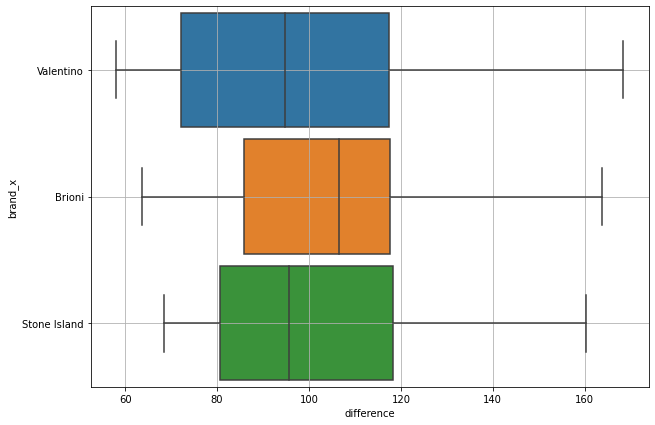

In [29]:
# график распределения difference
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    merged,
    x = 'difference',
    y = 'brand_x',
    width=0.9
)
boxplot.grid()